In [1]:
# RUNNING THE TRANSFORMER PIPELINE

from models.transformer_model import TransformerModel
from dataloader.data import DataModuleTask
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from argparse import ArgumentParser

/home/ryanchi/miniconda3/envs/sard/lib/python3.9/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [2]:
# -------------------------------------------------------------------
#  (dm) DataModuleTask(task) with task either 'eol' or 'surgical'
#  (model) TransformerModel(embed_size, max_concepts, max_visits) 
# -------------------------------------------------------------------

dm = DataModuleTask(task='eol')

In [3]:
dm.setup(split=(0.6, 0.1))

In [4]:
model = TransformerModel(max_days=dm.max_days, 
                        num_concepts=dm.num_concepts,
                        max_visits=dm.max_visits,
                        learning_rate=0.0001)

/home/ryanchi/miniconda3/envs/sard/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [5]:
trainer = Trainer(gpus=[4], max_epochs=4)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


In [ ]:
trainer.fit(model, dm)


  | Name     | Type             | Params
----------------------------------------------
0 | loss     | BCELoss          | 0     
1 | auc_test | AUROC            | 0     
2 | trans    | VisitTransformer | 23.5 M
3 | pooler   | Linear           | 8.2 K 
4 | linear   | Linear           | 6.0 K 
5 | dropout  | Dropout          | 0     
6 | sig      | Sigmoid          | 0     
----------------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
93.966    Total estimated model params size (MB)
/home/ryanchi/miniconda3/envs/sard/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Validation sanity check: 0it [00:00, ?it/s]

Validation Loss:  0.7105129957199097


/home/ryanchi/miniconda3/envs/sard/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Training Loss:  0.5318541526794434


Validating: 0it [00:00, ?it/s]

Validation Loss:  0.43952107429504395
Training Loss:  0.43887650966644287


Validating: 0it [00:00, ?it/s]

Validation Loss:  0.4070531129837036
Training Loss:  0.4055570960044861


Validating: 0it [00:00, ?it/s]

Validation Loss:  0.3993513286113739
Training Loss:  0.3678755462169647


Validating: 0it [00:00, ?it/s]

Validation Loss:  0.3883892893791199


In [8]:
trainer.test(datamodule=dm)
print("Test Loss: ", model.test_results['test_loss'].item())
print("Test AUROC: ", model.test_results['test_auc'].item())

/home/ryanchi/miniconda3/envs/sard/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.47783076763153076}
--------------------------------------------------------------------------------
Test Loss:  0.4009840190410614
Test AUROC:  0.46153849363327026


/home/ryanchi/miniconda3/envs/sard/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: `pos_label` automatically set 1.
  warnings.warn(*args, **kwargs)


In [20]:
y = model.test_results['y']
y_hat = model.test_results['y_hat']

In [21]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y.cpu(), y_hat.cpu())
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.5575874238049406

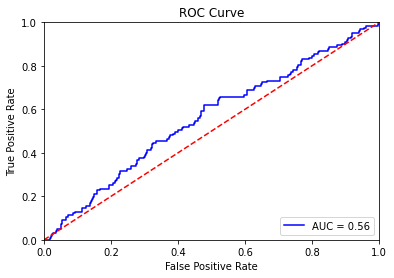

In [22]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
sum(y)/len(y)

tensor([0.1059], device='cuda:4')